In [6]:
import tensorflow as tf

print(tf.__version__)

from tf2_yolov4.anchors import YOLOV4_ANCHORS
from tf2_yolov4.model import YOLOv4
import tensorflow_addons as tfa
import json
import numpy as np
import matplotlib.pyplot as plt
from pathlib import Path

from object_detection import get_bounding_box, plot_results, plot_bounding_box

HEIGHT, WIDTH = (640, 960)

2.7.0


In [7]:
from tensorflow.keras.utils import image_dataset_from_directory

In [8]:
model = YOLOv4(
    input_shape=(HEIGHT, WIDTH, 3),
    anchors=YOLOV4_ANCHORS,
    num_classes=80,
    training=False,
    yolo_max_boxes=100,
    yolo_iou_threshold=0.5,
    yolo_score_threshold=0.5,
)

model.load_weights("/Users/deepakduggirala/Documents/yolov4.h5")

In [13]:
name = '1000/IMG_1626'
fname = Path('/Users/deepakduggirala/Documents/Elephants-dataset-png') / (name + '.png')
json_fname = Path('/Users/deepakduggirala/Documents/Elephants-dataset') / (name + '.json')

In [9]:
root_dir = Path('/Users/deepakduggirala/Documents/ELPephant/images')
fname = sorted(root_dir.iterdir())[4]
fname

PosixPath('/Users/deepakduggirala/Documents/ELPephant/images/1002_Cynthia I rightside_May2010.jpg')

In [14]:
image = tf.io.read_file(str(fname))
image = tf.image.decode_image(image)
image = tf.image.resize(image, (HEIGHT, WIDTH))
images = tf.expand_dims(image, axis=0) / 255.0

In [15]:
boxes, scores, classes, valid_detections = model.predict(images)
valid_detections

array([2], dtype=int32)

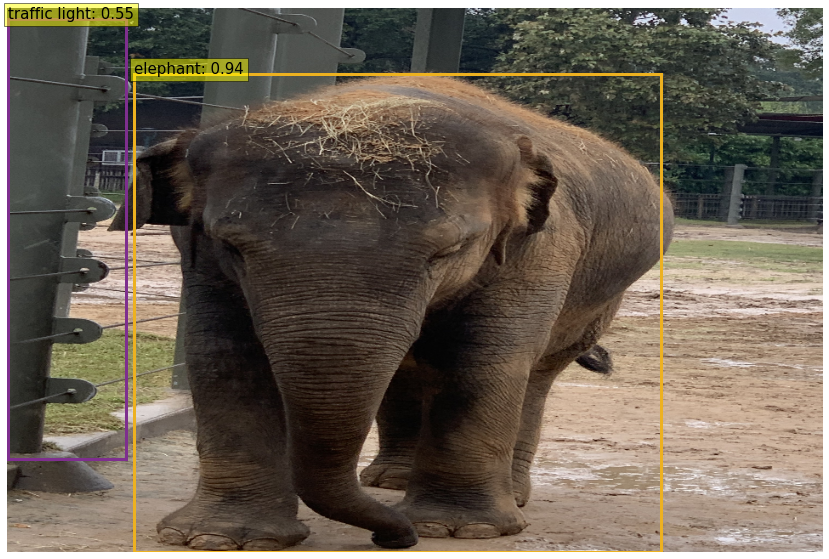

In [16]:
plot_results(
    images[0],
    boxes[0] * [WIDTH, HEIGHT, WIDTH, HEIGHT],
    scores[0],
    classes[0].astype(int),
)

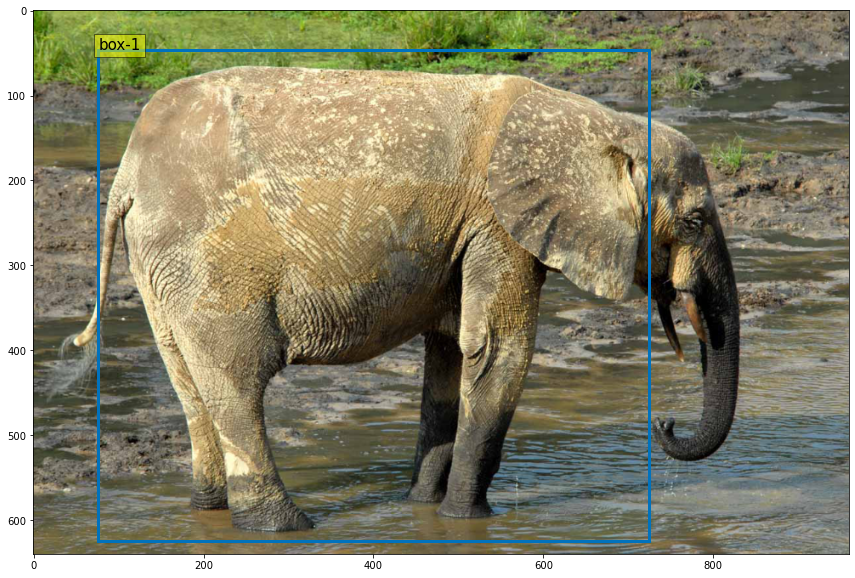

In [13]:
plot_bounding_box(images[0], boxes[0, 0].reshape(1,-1), None, True)

In [83]:
y_true, (H,W) = get_bounding_box(json_fname, normalize=True)

In [84]:
y_pred = boxes[0,0]

In [85]:
1-tfa.losses.giou_loss(y_true, y_pred).numpy()

0.7229239344596863

In [86]:
img = plt.imread(fname)

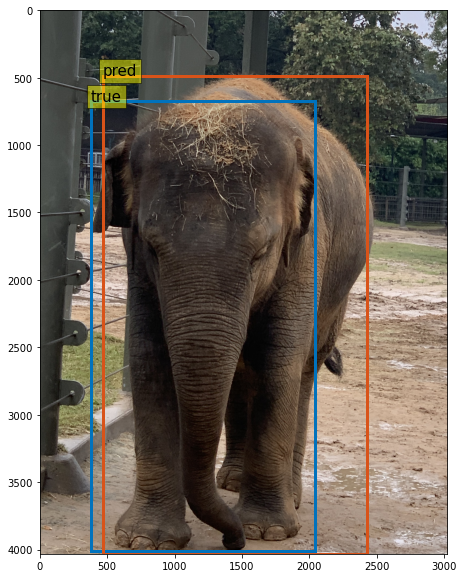

In [87]:
plot_bounding_box(img, [y_true, y_pred], ['true', 'pred'], normalized=True)

In [88]:
y_true

array([0.12491373, 0.16701173, 0.67558086, 0.99516908])

In [89]:
y_pred

array([0.15515998, 0.12008056, 0.8017739 , 1.        ], dtype=float32)

In [90]:
def iou(box1, box2):
    x1_min, y1_min, x1_max, y1_max = box1
    x2_min, y2_min, x2_max, y2_max = box2
    
    x_union_min, y_union_min = min(x1_min, x2_min), min(y1_min, y2_min)
    x_union_max, y_union_max = max(x1_max, x2_max), max(y1_max, y2_max)
    union_area = (x_union_max - x_union_min) * (y_union_max - y_union_min)
    
    x_intersection_min, y_intersection_min = max(x1_min, x2_min), max(y1_min, y2_min)
    x_intersection_max, y_intersection_max = min(x1_max, x2_max), min(y1_max, y2_max)
    intersection_area = (x_intersection_max - x_intersection_min) * (y_intersection_max - y_intersection_min)
    
    return intersection_area/union_area


iou(y_true, y_pred)

0.7236452500588477